<a href="https://colab.research.google.com/github/iamvarada/colab_ML/blob/main/cloth_detection_using_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## Convolutional Neural Network (CNN)

## Achieves higher accuracy then pure dense layered neural network

## Defs:
## 1. Convolution - 
## lets take pixel image - 6x6 -- 2D array for a computer, if grayscale - values b/w 0 (black) and 255 (white) ...
## ... take a kernel of any size smaller than input image (lets say 3x3), center it on the image pixel under consideration - run it along the pixel array (6x6) ...
## ... Multiply kernel with each pixel in the corresponding portion of the image, then sum up all the elements ...
## ... Populate the number in the index in the convoluted image corresponding to the original image index.

### ... For elements in the image for which we cannot center the kernel on (like corner pixels in the image), we apply padding (comman way is 0 padding)

## 2. Max pooling - 
## "Pooling" : is a technique to downsample the image. Most common type is max-pooling (take the max value in the grid).
## We need to select "grid" (aka pool size = size of the window within which you take the max value ) and ...
## ... "stride" (how many pixels do you move or slide the grid by, for each max computation)
## This reduces the dimension of the convolution image to a new image, which is smaller than the original image (aka down-sampling)
## e.g.: if convoluted image is 6x6, grid size is 2x2 and stide is 2, then new image will have dimension 3x3 (half the resolution)

## Dataset: MNIST (same as the one used for the Dense layer)
## Goal: Image classification with CNN



In [4]:
# Install tensorflow datasets package

!pip install -U tensorflow_datasets
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:

from __future__ import absolute_import, division, print_function

# Improt TF and TF datasets
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


# Sanity check
print(tf.__version__)

2.12.0


In [6]:
# Load dataset

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete1RXCFB/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete1RXCFB/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
# Define labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
   

In [8]:
# Check the data

num_train_examples = len(train_dataset) 
num_test_examples = len(test_dataset)

print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [9]:

# Pre-process the data (normalize each pixel value from [0, 255] to [0, 1])

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# Apply the normalize function to each element of test and train datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

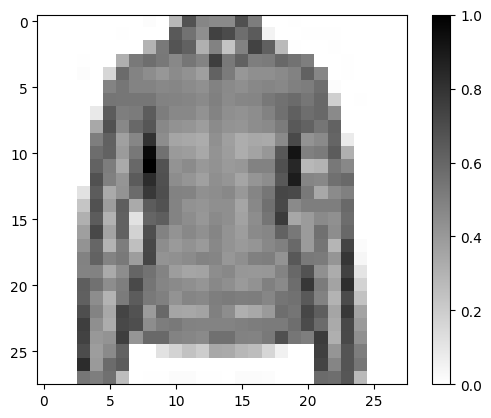

In [10]:

# Check the pre-processed data

for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28)) # convert image to 2D array

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Build the model

model = tf.keras.Sequential([
    # 32 convoluted images output with same size as input
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = tf.nn.relu, input_shape=(28,28,1)), # kernel size: 3x3
    # down-samples the 32 images
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    # takes the 32 images, and creates 64 convoluted images as output
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = tf.nn.relu),
    # size further reduced - further down-sampling
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Flatten(), # flatten the images into 1D array
    # output layers now..
    tf.keras.layers.Dense(128, activation = tf.nn.relu), #128 neurons
    # final layers takes the output of 128 neurons and produces 10 neurons as output with values b/w [0,1] (courtesy softmax). Sum of all neuron values = 1
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
     ])

In [13]:
# Compile the model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [14]:
# Organize the train and test datasets for training the model
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# accuracy is much higher, dense network only reached ~80% accuracy

In [16]:
# Train the model
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 26s 6ms/step - loss: 0.3950 - accuracy: 0.8579
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2554 - accuracy: 0.9079
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2135 - accuracy: 0.9229
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1793 - accuracy: 0.9337
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1520 - accuracy: 0.9434
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1273 - accuracy: 0.9532
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1089 - accuracy: 0.9599
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0928 - accuracy: 0.9657
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0730 - accuracy: 0.9735
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss:

In [17]:
# Test on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))

# Accuracy is lower here because we trained the model for too many epochs (10) and hence it overfit!! 
## We can follow-up by reducing the number of epochs or stopping the training early but that's for later!!

313/313 [==============================] - 2s 6ms/step - loss: 0.3261 - accuracy: 0.9158
